## Best Model Information

In [4]:
import torch

ckpt_path = "checkpoints/exp_0316/exp-epoch=036-val_loss=0.1052.ckpt"
checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))  # 加载到 CPU，避免显存问题

print(checkpoint.keys())

if "state_dict" in checkpoint:
    print("\nModel State Dict Keys:")
    print(checkpoint["state_dict"].keys())

if "epoch" in checkpoint:
    print(f"\nEpoch: {checkpoint['epoch']}")
if "loss" in checkpoint:
    print(f"Loss: {checkpoint['loss']}")


dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])

Model State Dict Keys:
odict_keys(['encoder.1.weight', 'encoder.1.bias', 'encoder.3.weight', 'encoder.3.bias', 'encoder.5.weight', 'encoder.5.bias', 'decoder.0.weight', 'decoder.0.bias', 'decoder.2.weight', 'decoder.2.bias', 'decoder.4.weight', 'decoder.4.bias'])

Epoch: 36


In [5]:
print(f"Epoch: {checkpoint['epoch']}")
print(f"Global Step: {checkpoint['global_step']}")

Epoch: 36
Global Step: 134347


## Loss Analysis

### Unlabled Model Fitting


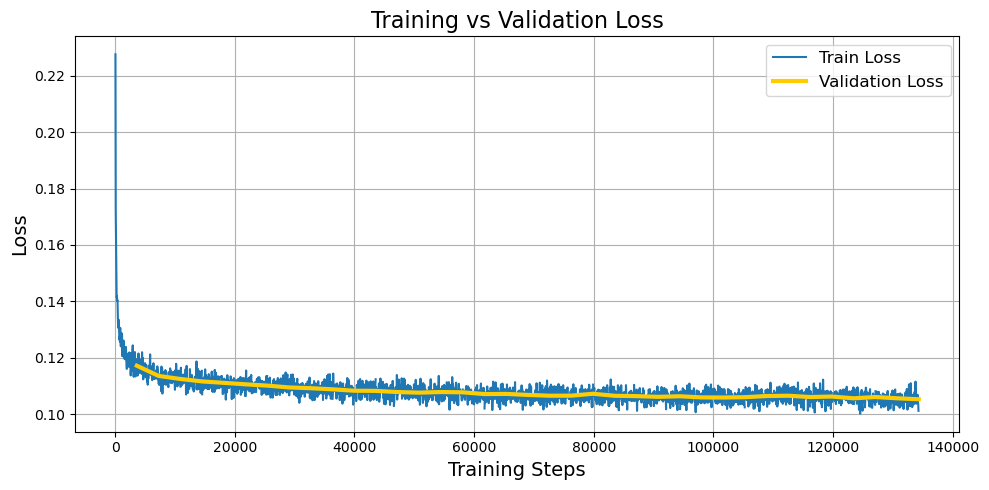

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## X axis in steps

df = pd.read_csv("logs/autoencoder/version_6/metrics.csv")
df_val = df.dropna(subset=["val_loss"])

plt.figure(figsize=(10, 5))

# Train Loss
plt.plot(df["step"], df["train_loss"], label="Train Loss", color="#1f77b4", alpha=1)
# Validation Loss
plt.plot(df_val["step"], df_val["val_loss"], label="Validation Loss", color="#ffcc00", linestyle="-", linewidth=3)  

plt.xlabel("Training Steps", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Training vs Validation Loss", fontsize=16)
plt.legend(fontsize=12)  
plt.grid(True)
plt.tight_layout()

plt.savefig("logs/autoencoder/version_6/loss_plot.png", dpi=300, bbox_inches="tight")
plt.show()


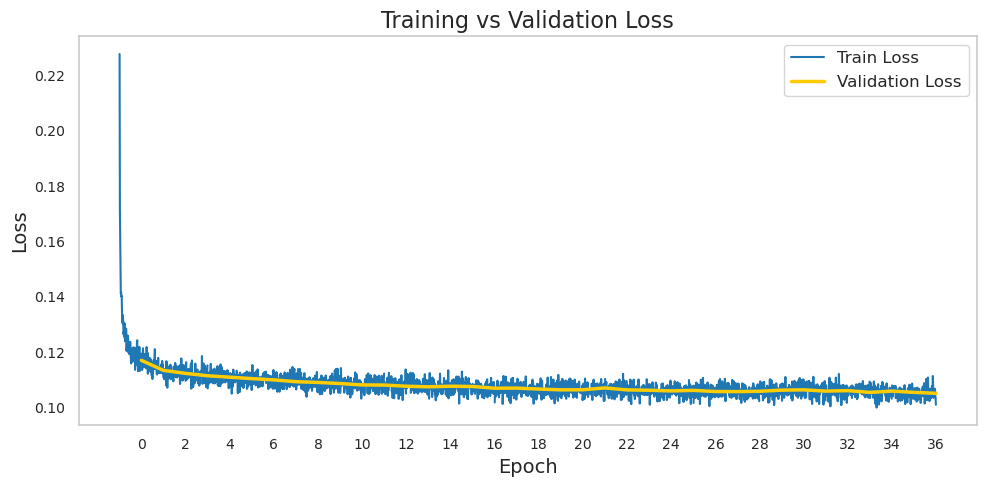

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

## X axis in Epoch

df = pd.read_csv("logs/autoencoder/version_6/metrics.csv")
df_val = df.dropna(subset=["val_loss"])

plt.figure(figsize=(10, 5))
plt.plot(df["step"], df["train_loss"], label="Train Loss", color="#1f77b4", alpha=1)

plt.plot(df_val["step"], df_val["val_loss"], label="Validation Loss",
         color="#ffcc00", linestyle="-", linewidth=2.5)

epoch_steps = df_val["step"].iloc[::2] 
epoch_labels = df_val["epoch"].iloc[::2].astype(int)

plt.xticks(epoch_steps, epoch_labels) 
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Training vs Validation Loss", fontsize=16)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()

plt.savefig("logs/autoencoder/version_6/loss_plot.png", dpi=300, bbox_inches="tight")
plt.show()


### Finetuning


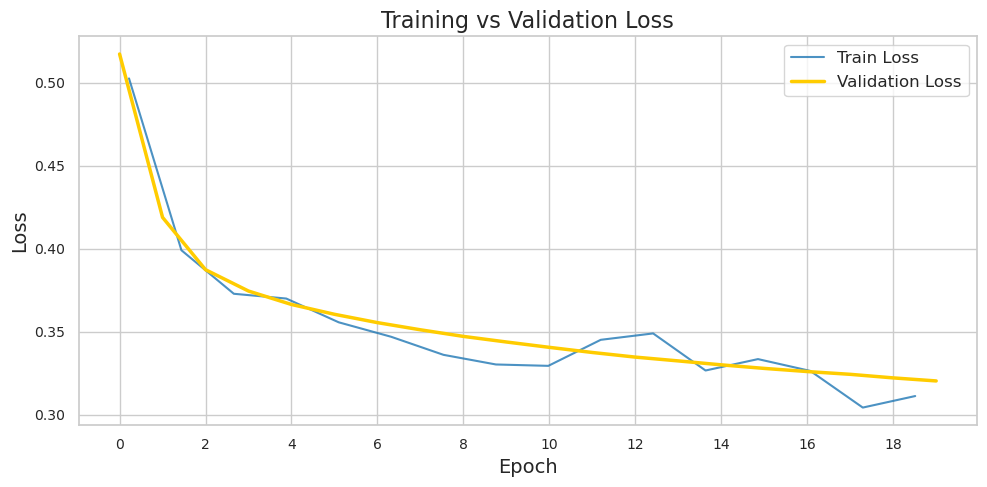

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logs/finetune/version_1/metrics.csv")
df_train = df.dropna(subset=["train_loss"])
df_val = df.dropna(subset=["val_loss"])

plt.figure(figsize=(10, 5))

# training loss
plt.plot(df_train["step"], df_train["train_loss"],
         label="Train Loss", color="#1f77b4", alpha=0.8)

# validation loss
plt.plot(df_val["step"], df_val["val_loss"],
         label="Validation Loss", color="#ffcc00", linewidth=2.5)

epoch_steps = df_val["step"].iloc[::2]
epoch_labels = df_val["epoch"].iloc[::2].astype(int)
plt.xticks(epoch_steps, epoch_labels)

plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Training vs Validation Loss", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig("logs/finetune/version_1/loss_plot.png", dpi=300)
plt.show()


## Autoencoder Features PCA 

label label counts:
 label
-1.0    42830
 1.0    39192
 0.0    32908
Name: count, dtype: int64


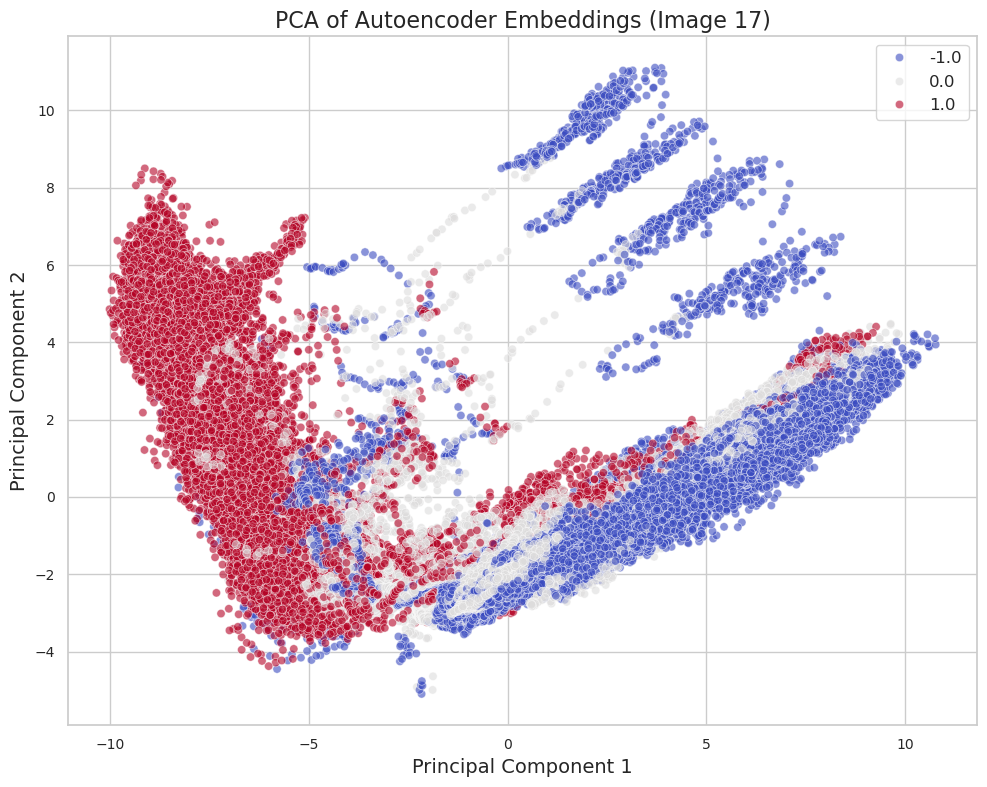

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df_raw = pd.read_csv('../data_labeled_raw/image17_raw.csv')  # raw data: y, x, label
df_emb = pd.read_csv('Outcome_3_image_2/image17_ae.csv')      # AE data: y, x, ae0-ae7

df = pd.merge(df_emb, df_raw[['y', 'x', 'label']], on=['y', 'x'])

print("label label counts:\n", df['label'].value_counts())

# PCA visulization
embedding_cols = [f'ae{i}' for i in range(8)]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[embedding_cols])
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='label', palette='coolwarm', alpha=0.6)
plt.title('PCA of Autoencoder Embeddings (Image 17)',fontsize=16)
plt.xlabel('Principal Component 1',fontsize=14)
plt.ylabel('Principal Component 2',fontsize=14)
plt.legend(title='label',fontsize=16)
plt.tight_layout()
plt.legend(fontsize=12)

plt.savefig("Outcome_3_image_2/AE_features.png", dpi=300, bbox_inches="tight")
plt.show()

